In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Data/train_indessa.csv')

In [3]:
df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36 months,,12.49,B,B5,Registered Nurse,...,0.0,NaN,INDIVIDUAL,NaN,65th week,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60 months,BAT2003848,14.99,C,C5,Account Mgr,...,0.0,NaN,INDIVIDUAL,NaN,70th week,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60 months,NaN,20.80,E,E1,Comcast cable,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60 months,BAT3193689,16.29,D,D2,Resident Physician,...,0.0,NaN,INDIVIDUAL,NaN,78th week,0.0,0.0,29197.0,23300.0,0


In [3]:
df.drop('batch_enrolled', axis=1, inplace=True)
df.drop('emp_title', axis=1, inplace=True)
df.drop('desc', axis=1, inplace=True)
df.drop('member_id', axis=1, inplace=True)

In [4]:
pd.set_option('display.max_columns', 45)

# Handling Missing Values

In [5]:
df['emp_length'].fillna('10+ years', inplace=True)

In [6]:
df['annual_inc'].fillna(6500, inplace=True)

In [7]:
df['title'].fillna('Debt consolidation', inplace=True)
df.dropna(axis='index', how='all', subset=['delinq_2yrs'], inplace=True)

In [8]:
df['revol_util'].fillna(24, inplace=True)
df['collections_12_mths_ex_med'].fillna(0.0, inplace=True)

In [9]:
def impute_mths_since_derog(cols):
    mths_since_derog = cols[0]
    delinq_2yrs = cols[1]
    
    if pd.isnull(mths_since_derog):
        if delinq_2yrs==0.0:
            return 52
        else:
            return 18
    
    else:
        return mths_since_derog

In [10]:
df['mths_since_last_major_derog'] = df[['mths_since_last_major_derog', 'delinq_2yrs']].apply(impute_mths_since_derog, axis=1)

In [11]:
df.drop('verification_status_joint', axis=1, inplace=True)

In [12]:
df['tot_coll_amt'].fillna(0.0, inplace=True)
df['tot_cur_bal'].fillna(0.0, inplace=True)
df['total_rev_hi_lim'].fillna(0.0, inplace=True)

In [13]:
df.drop('mths_since_last_record', axis=1, inplace=True)

In [14]:
df.drop('mths_since_last_delinq', axis=1, inplace=True)

# FEATURE ENGINEERING

In [15]:
def clean_term(term):
    ls = term.split(' ')
    return np.int64(ls[0])

df['term'] = df['term'].apply(clean_term)

In [16]:
def clean_emp_length(length):
    if length=='10+ years':
        x = length.split('+')
        return np.int64(x[0])
    elif length=='< 1 year':
        x = length.split(' ')
        return np.int64(x[1])
    else:
        x = length.split(' ')
        return np.int64(x[0])
    
df['emp_length'] = df['emp_length'].apply(clean_emp_length)

In [17]:
df.drop('title', axis=1, inplace=True)

In [18]:
def clean_zip(zip):
    x = zip.split('x')
    return np.int64(x[0])

df['zip_code'] = df['zip_code'].apply(clean_zip)

In [19]:
df.drop('addr_state', axis=1, inplace=True)

In [20]:
def clean_last_week_pay(week):
    x = week.split('th')
    if x[0] == 'NA':
        return 0
    else:
        return np.int64(x[0])

df['last_week_pay'] = df['last_week_pay'].apply(clean_last_week_pay)

In [21]:
df_clean = pd.get_dummies(df, drop_first=True)

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [23]:
X = df_clean.drop('loan_status', axis=1)
y = df_clean['loan_status']

In [24]:
X2D = pca.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()

In [27]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred = forest_clf.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[80917,   640],
       [15889,  9037]])

In [30]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8447733441018754

In [70]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

In [72]:
from sklearn.model_selection import cross_val_score

cross_val_score(tree_clf, X_train, y_train, cv=3, scoring='roc_auc')

array([0.77208616, 0.77618689, 0.77774706])

In [73]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs=[]
for ccp_alpha in ccp_alphas[15900:]:
    dec_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dec_tree.fit(X, y)
    clfs.append(dec_tree)
print("No. of nodes in the last tree is {} ,with ccp_alpha {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

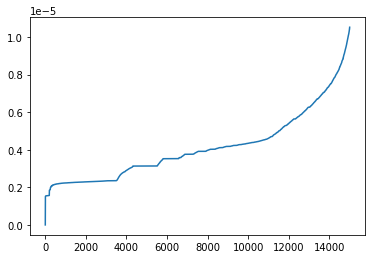

In [89]:
plt.plot(ccp_alphas[:15000])

In [95]:
ccp_alphas[15900]

0.00013080184068621698